# House of Price
## EDA — Análise Exploratória dos Dados

### 📌 Objetivos do EDA:
* Entender a estrutura e qualidade dos dados
* Identificar variáveis importantes
* Detectar outliers, valores ausentes e distribuições
* Formular hipóteses

### Sequencia de atribuições
| Etapa                | Limpeza | Tipo de limpeza recomendada                             |
| -------------------- | ------------ | ------------------------------------------------------- |
| Carregamento inicial | ‼️ Depende        | Colunas completamente nulas, dtypes errados             |
| Início da EDA        | ⚠️ Parcial   | Olhar dados, visualizar distribuições, valores ausentes |
| Pós-gráficos         | ✅ Sim        | Remover outliers, preencher NaNs com base no contexto   |


### 1. Configurações Iniciais


In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from setup_notebook import setup_path
setup_path()
from src.functions import *

from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

color_palette21 = [
    "#004C4C", "#006666", "#008080", "#199191", "#29A3A3",
    "#40B5B5", "#55C7C7", "#66D9D9", "#80ECEC", "#99FFFF", 
    "#FFD580", "#FFC460", "#FFB240", "#FFA020", "#FF8E00",
    "#FF7C00", "#FF6400", "#FF4C00", "#FF3300", "#FF1A00", "#FF0000"]

sns.set_palette(sns.color_palette(color_palette21))
sns.color_palette(color_palette21)

[(0.0, 0.2980392156862745, 0.2980392156862745),
 (0.0, 0.4, 0.4),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.09803921568627451, 0.5686274509803921, 0.5686274509803921),
 (0.1607843137254902, 0.6392156862745098, 0.6392156862745098),
 (0.25098039215686274, 0.7098039215686275, 0.7098039215686275),
 (0.3333333333333333, 0.7803921568627451, 0.7803921568627451),
 (0.4, 0.8509803921568627, 0.8509803921568627),
 (0.5019607843137255, 0.9254901960784314, 0.9254901960784314),
 (0.6, 1.0, 1.0),
 (1.0, 0.8352941176470589, 0.5019607843137255),
 (1.0, 0.7686274509803922, 0.3764705882352941),
 (1.0, 0.6980392156862745, 0.25098039215686274),
 (1.0, 0.6274509803921569, 0.12549019607843137),
 (1.0, 0.5568627450980392, 0.0),
 (1.0, 0.48627450980392156, 0.0),
 (1.0, 0.39215686274509803, 0.0),
 (1.0, 0.2980392156862745, 0.0),
 (1.0, 0.2, 0.0),
 (1.0, 0.10196078431372549, 0.0),
 (1.0, 0.0, 0.0)]

---

## 🧮 2. Visão Geral e Estatísticas Básicas

In [2]:
# Carregando os dados
df = pd.read_csv("/home/akel/PycharmProjects/Kaggle/HousePrices/data/train.csv")
inital_describe(df,True)

📊 ANÁLISE EXPLORATÓRIA DO DATAFRAME

📈 DIMENSÕES DO DATASET:
   • 1460 linhas
   • 81 colunas
   • Total de células: 118260

🔧 TIPOS DE DADOS:
   • object: 43 colunas
   • int64: 35 colunas
   • float64: 3 colunas

🔍 VERIFICAÇÃO DE QUALIDADE DOS DADOS

📝 REGISTROS DUPLICADOS:
   • Total: 0
   • Percentual: 0.00%

❌ VALORES NULOS:
   • Total: 7829
   • Percentual: 6.62%

📊 COLUNAS COM VALORES NULOS:
   • LotFrontage: 259 nulos (17.74%)
   • Alley: 1369 nulos (93.77%)
   • MasVnrType: 872 nulos (59.73%)
   • MasVnrArea: 8 nulos (0.55%)
   • BsmtQual: 37 nulos (2.53%)
   • BsmtCond: 37 nulos (2.53%)
   • BsmtExposure: 38 nulos (2.60%)
   • BsmtFinType1: 37 nulos (2.53%)
   • BsmtFinType2: 38 nulos (2.60%)
   • Electrical: 1 nulos (0.07%)
   • FireplaceQu: 690 nulos (47.26%)
   • GarageType: 81 nulos (5.55%)
   • GarageYrBlt: 81 nulos (5.55%)
   • GarageFinish: 81 nulos (5.55%)
   • GarageQual: 81 nulos (5.55%)
   • GarageCond: 81 nulos (5.55%)
   • PoolQC: 1453 nulos (99.52%)
   • Fence: 

```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 3. Distribuição do Preço de Venda (Target) 

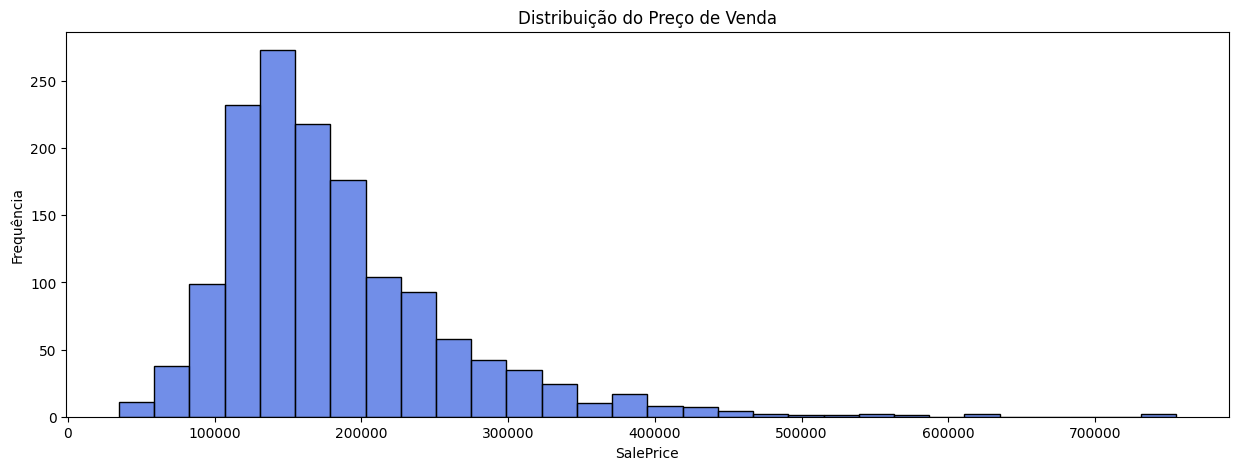

In [4]:

plt.figure(figsize=(15, 5))
sns.histplot(df["SalePrice"], color='royalblue', bins=30)
plt.title("Distribuição do Preço de Venda")
plt.xlabel("SalePrice")
plt.ylabel("Frequência")
plt.show()

```markdown
🔍 **Observação:** A variável `SalePrice` apresenta uma assimetria positiva . Isso pode ser tratado com transformação logarítmica na modelagem.
```
---
### 4. Correlação com SalePrice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

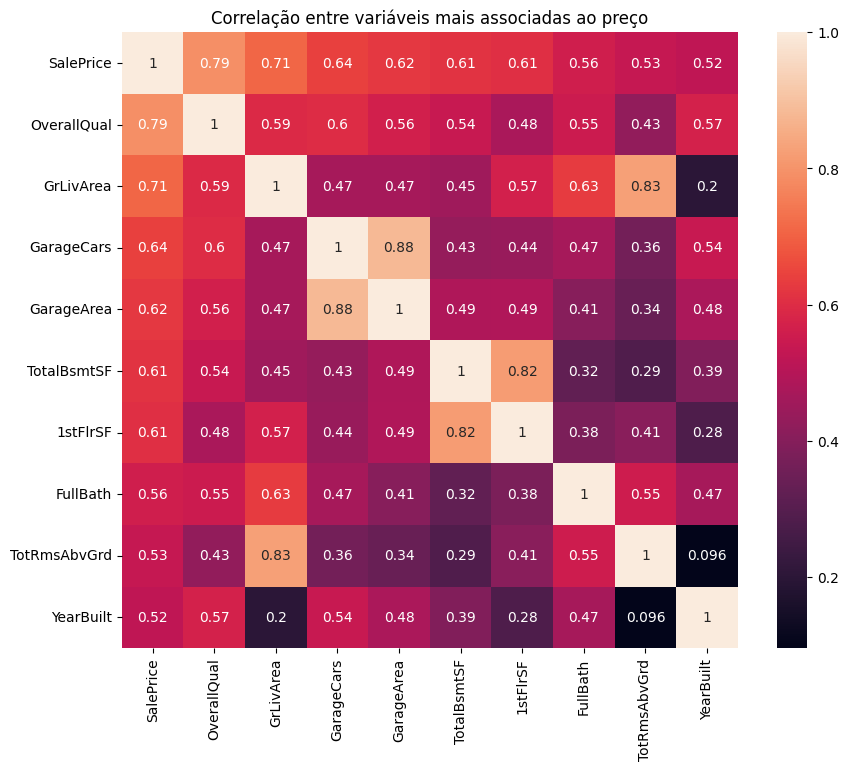

In [7]:
# Correlação com o preço de venda
corr = df.corr(numeric_only=True)   # realizar correlacao apenas nas variaveis numéricas                                 
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10) # c
#print("Top correlações com SalePrice:\n", top_corr)
display(top_corr)
# Heatmap das 10 principais variáveis
top_features = top_corr.index
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features].corr(), annot=True, square=True)
plt.title("Correlação entre variáveis mais associadas ao preço")
plt.show()

```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 5. Gráficos por variável (exemplos)

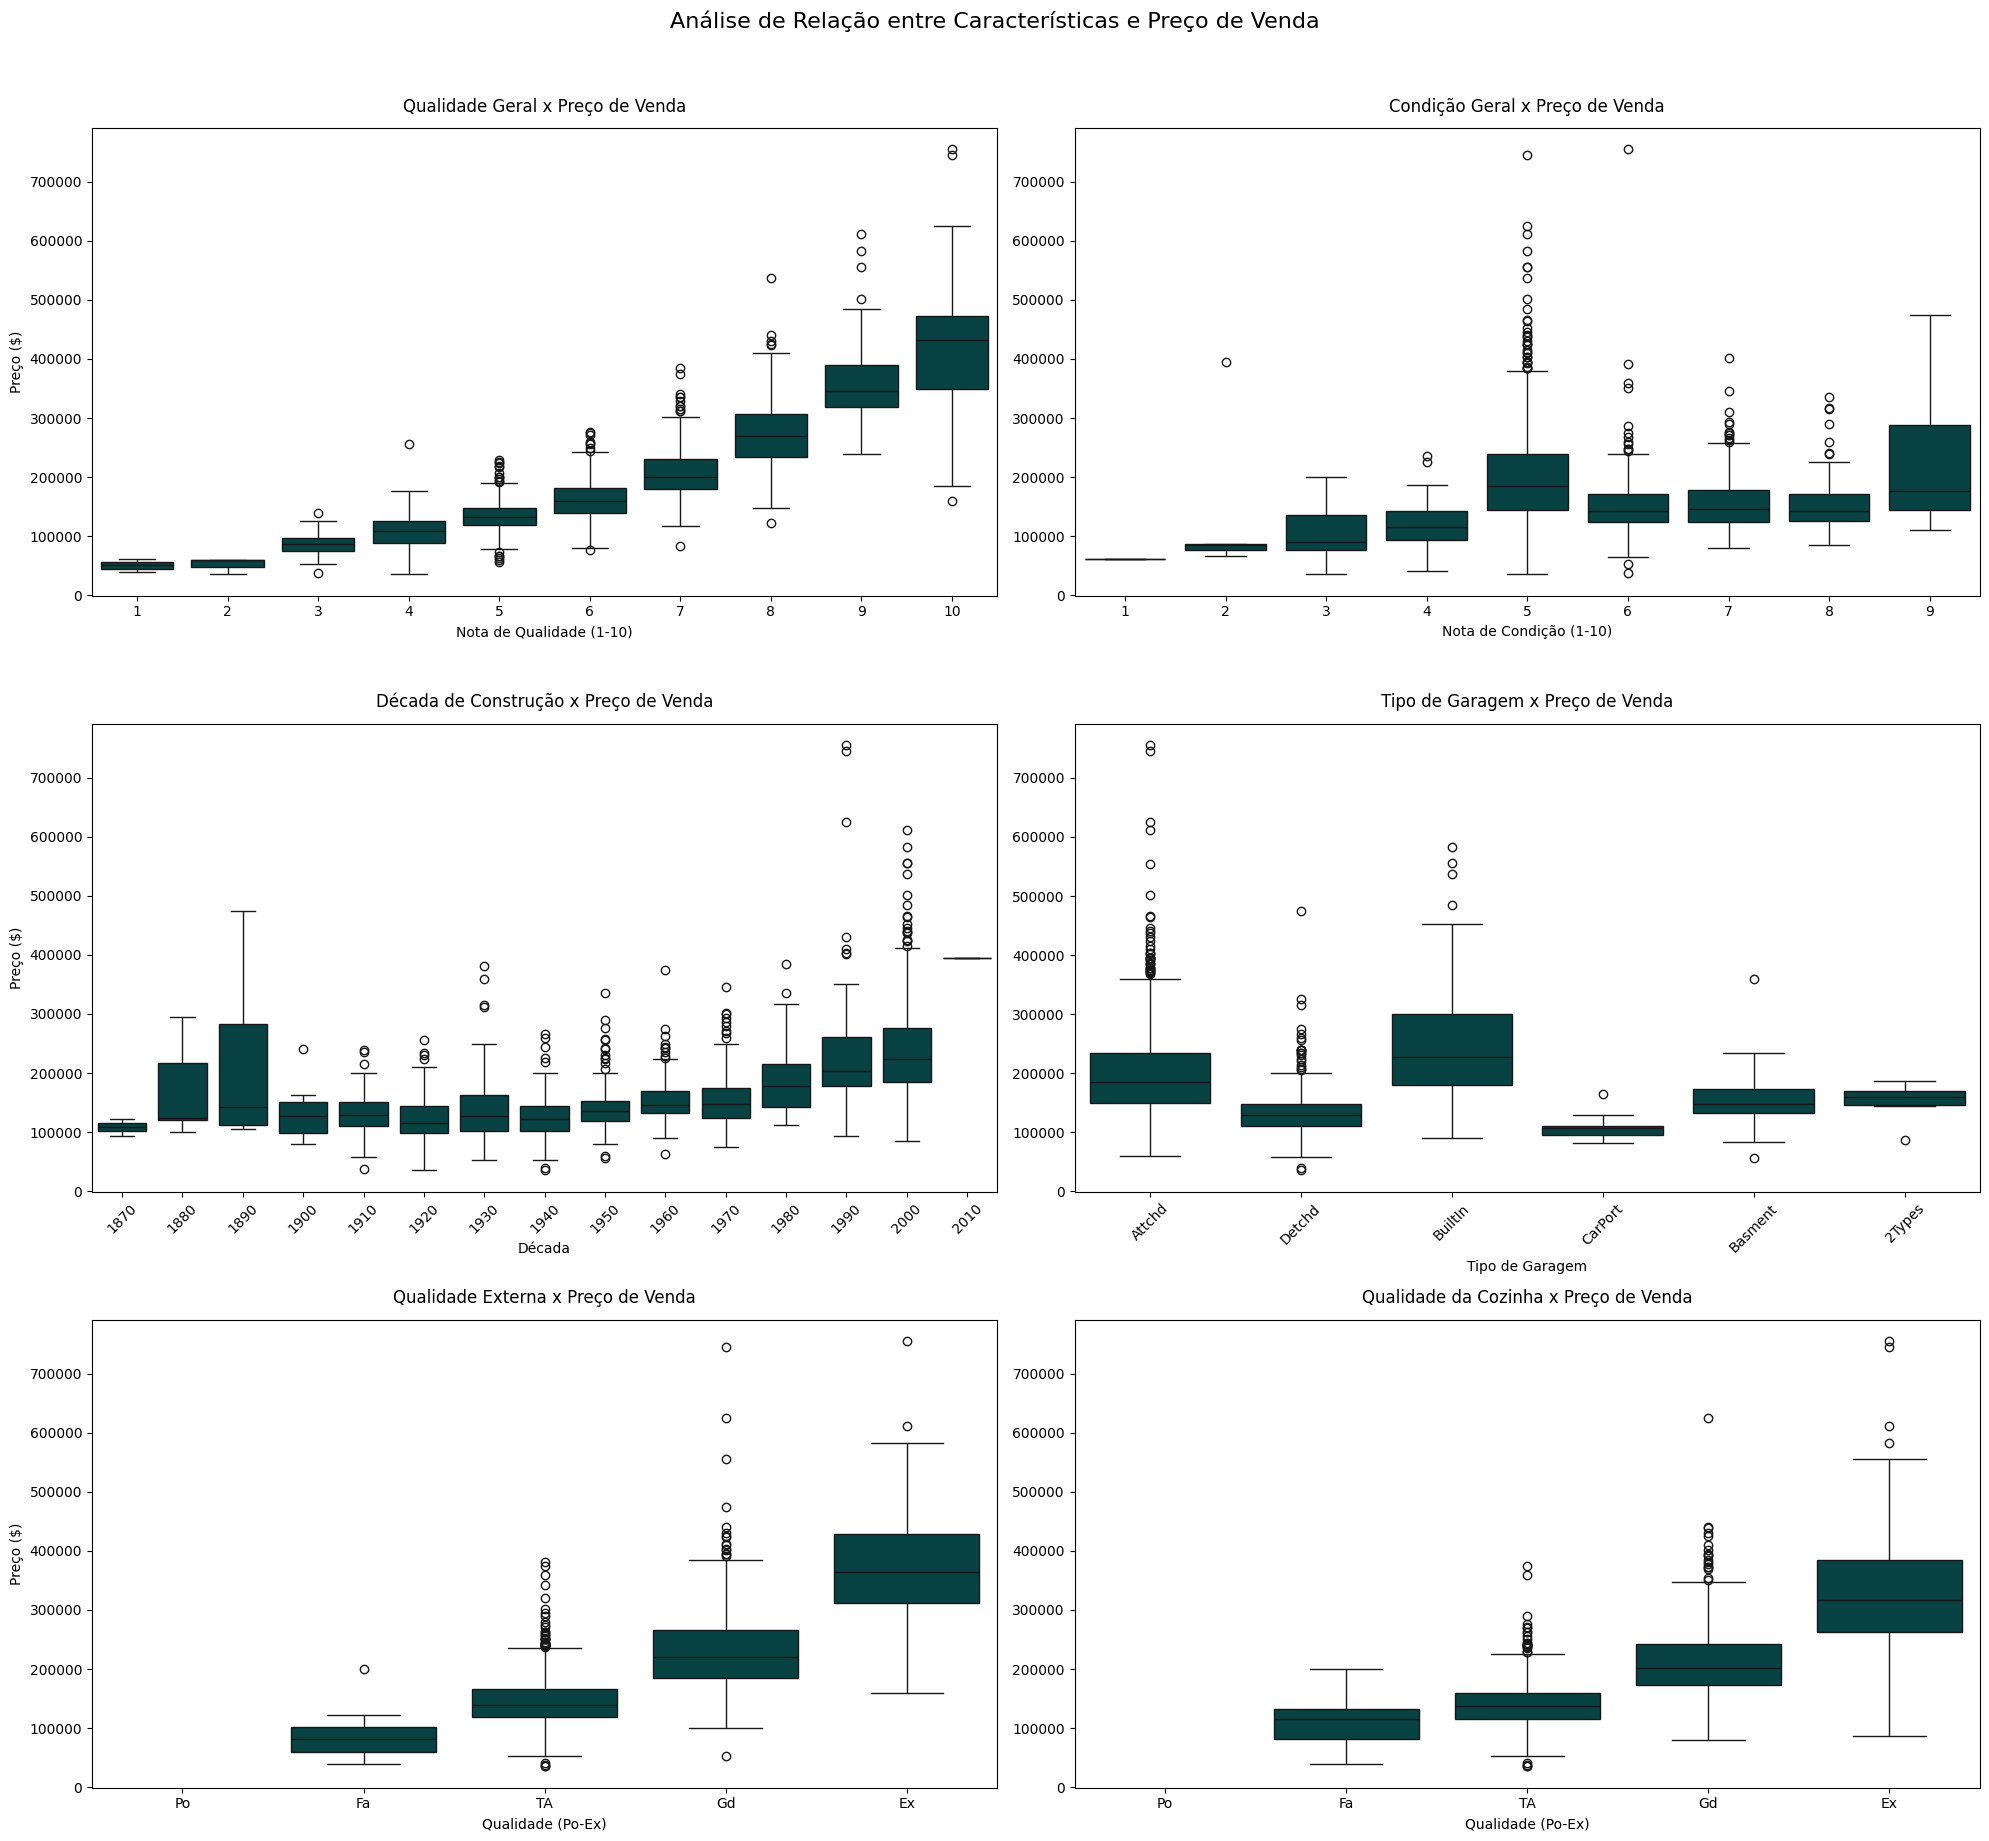

In [6]:
# Configuração da figura e eixos
fig, axs = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle('Análise de Relação entre Características e Preço de Venda', y=1.02, fontsize=16)

# Gráfico 1: Qualidade geral
sns.boxplot(data=df, x="OverallQual", y="SalePrice", ax=axs[0, 0])
axs[0, 0].set_title("Qualidade Geral x Preço de Venda", pad=12)
axs[0, 0].set_xlabel("Nota de Qualidade (1-10)")
axs[0, 0].set_ylabel("Preço ($)")

# Gráfico 2: Condição geral
sns.boxplot(x="OverallCond", y="SalePrice", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Condição Geral x Preço de Venda", pad=12)
axs[0, 1].set_xlabel("Nota de Condição (1-10)")
axs[0, 1].set_ylabel("")

# Gráfico 3: Década de construção
df["DecadeBuilt"] = (df["YearBuilt"] // 10) * 10
sns.boxplot(x="DecadeBuilt", y="SalePrice", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Década de Construção x Preço de Venda", pad=12)
axs[1, 0].set_xlabel("Década")
axs[1, 0].set_ylabel("Preço ($)")
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Tipo de garagem
sns.boxplot(x="GarageType", y="SalePrice", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Tipo de Garagem x Preço de Venda", pad=12)
axs[1, 1].set_xlabel("Tipo de Garagem")
axs[1, 1].set_ylabel("")
axs[1, 1].tick_params(axis='x', rotation=45)

# Gráfico 5: Qualidade externa
sns.boxplot(x="ExterQual", y="SalePrice", data=df, 
            order=["Po", "Fa", "TA", "Gd", "Ex"], ax=axs[2, 0])
axs[2, 0].set_title("Qualidade Externa x Preço de Venda", pad=12)
axs[2, 0].set_xlabel("Qualidade (Po-Ex)")
axs[2, 0].set_ylabel("Preço ($)")

# Gráfico 6: Qualidade da cozinha
sns.boxplot(x="KitchenQual", y="SalePrice", data=df, 
            order=["Po", "Fa", "TA", "Gd", "Ex"], ax=axs[2, 1])
axs[2, 1].set_title("Qualidade da Cozinha x Preço de Venda", pad=12)
axs[2, 1].set_xlabel("Qualidade (Po-Ex)")
axs[2, 1].set_ylabel("")

# Ajustes finais
plt.tight_layout()
plt.show()


```markdown
📌 **Nota:** O dataset possui variáveis contínuas e categóricas. Serão analisadas separadamente as mais relevantes.
```

---
### 6-Outliers

4 casas com área de 4000 m2.


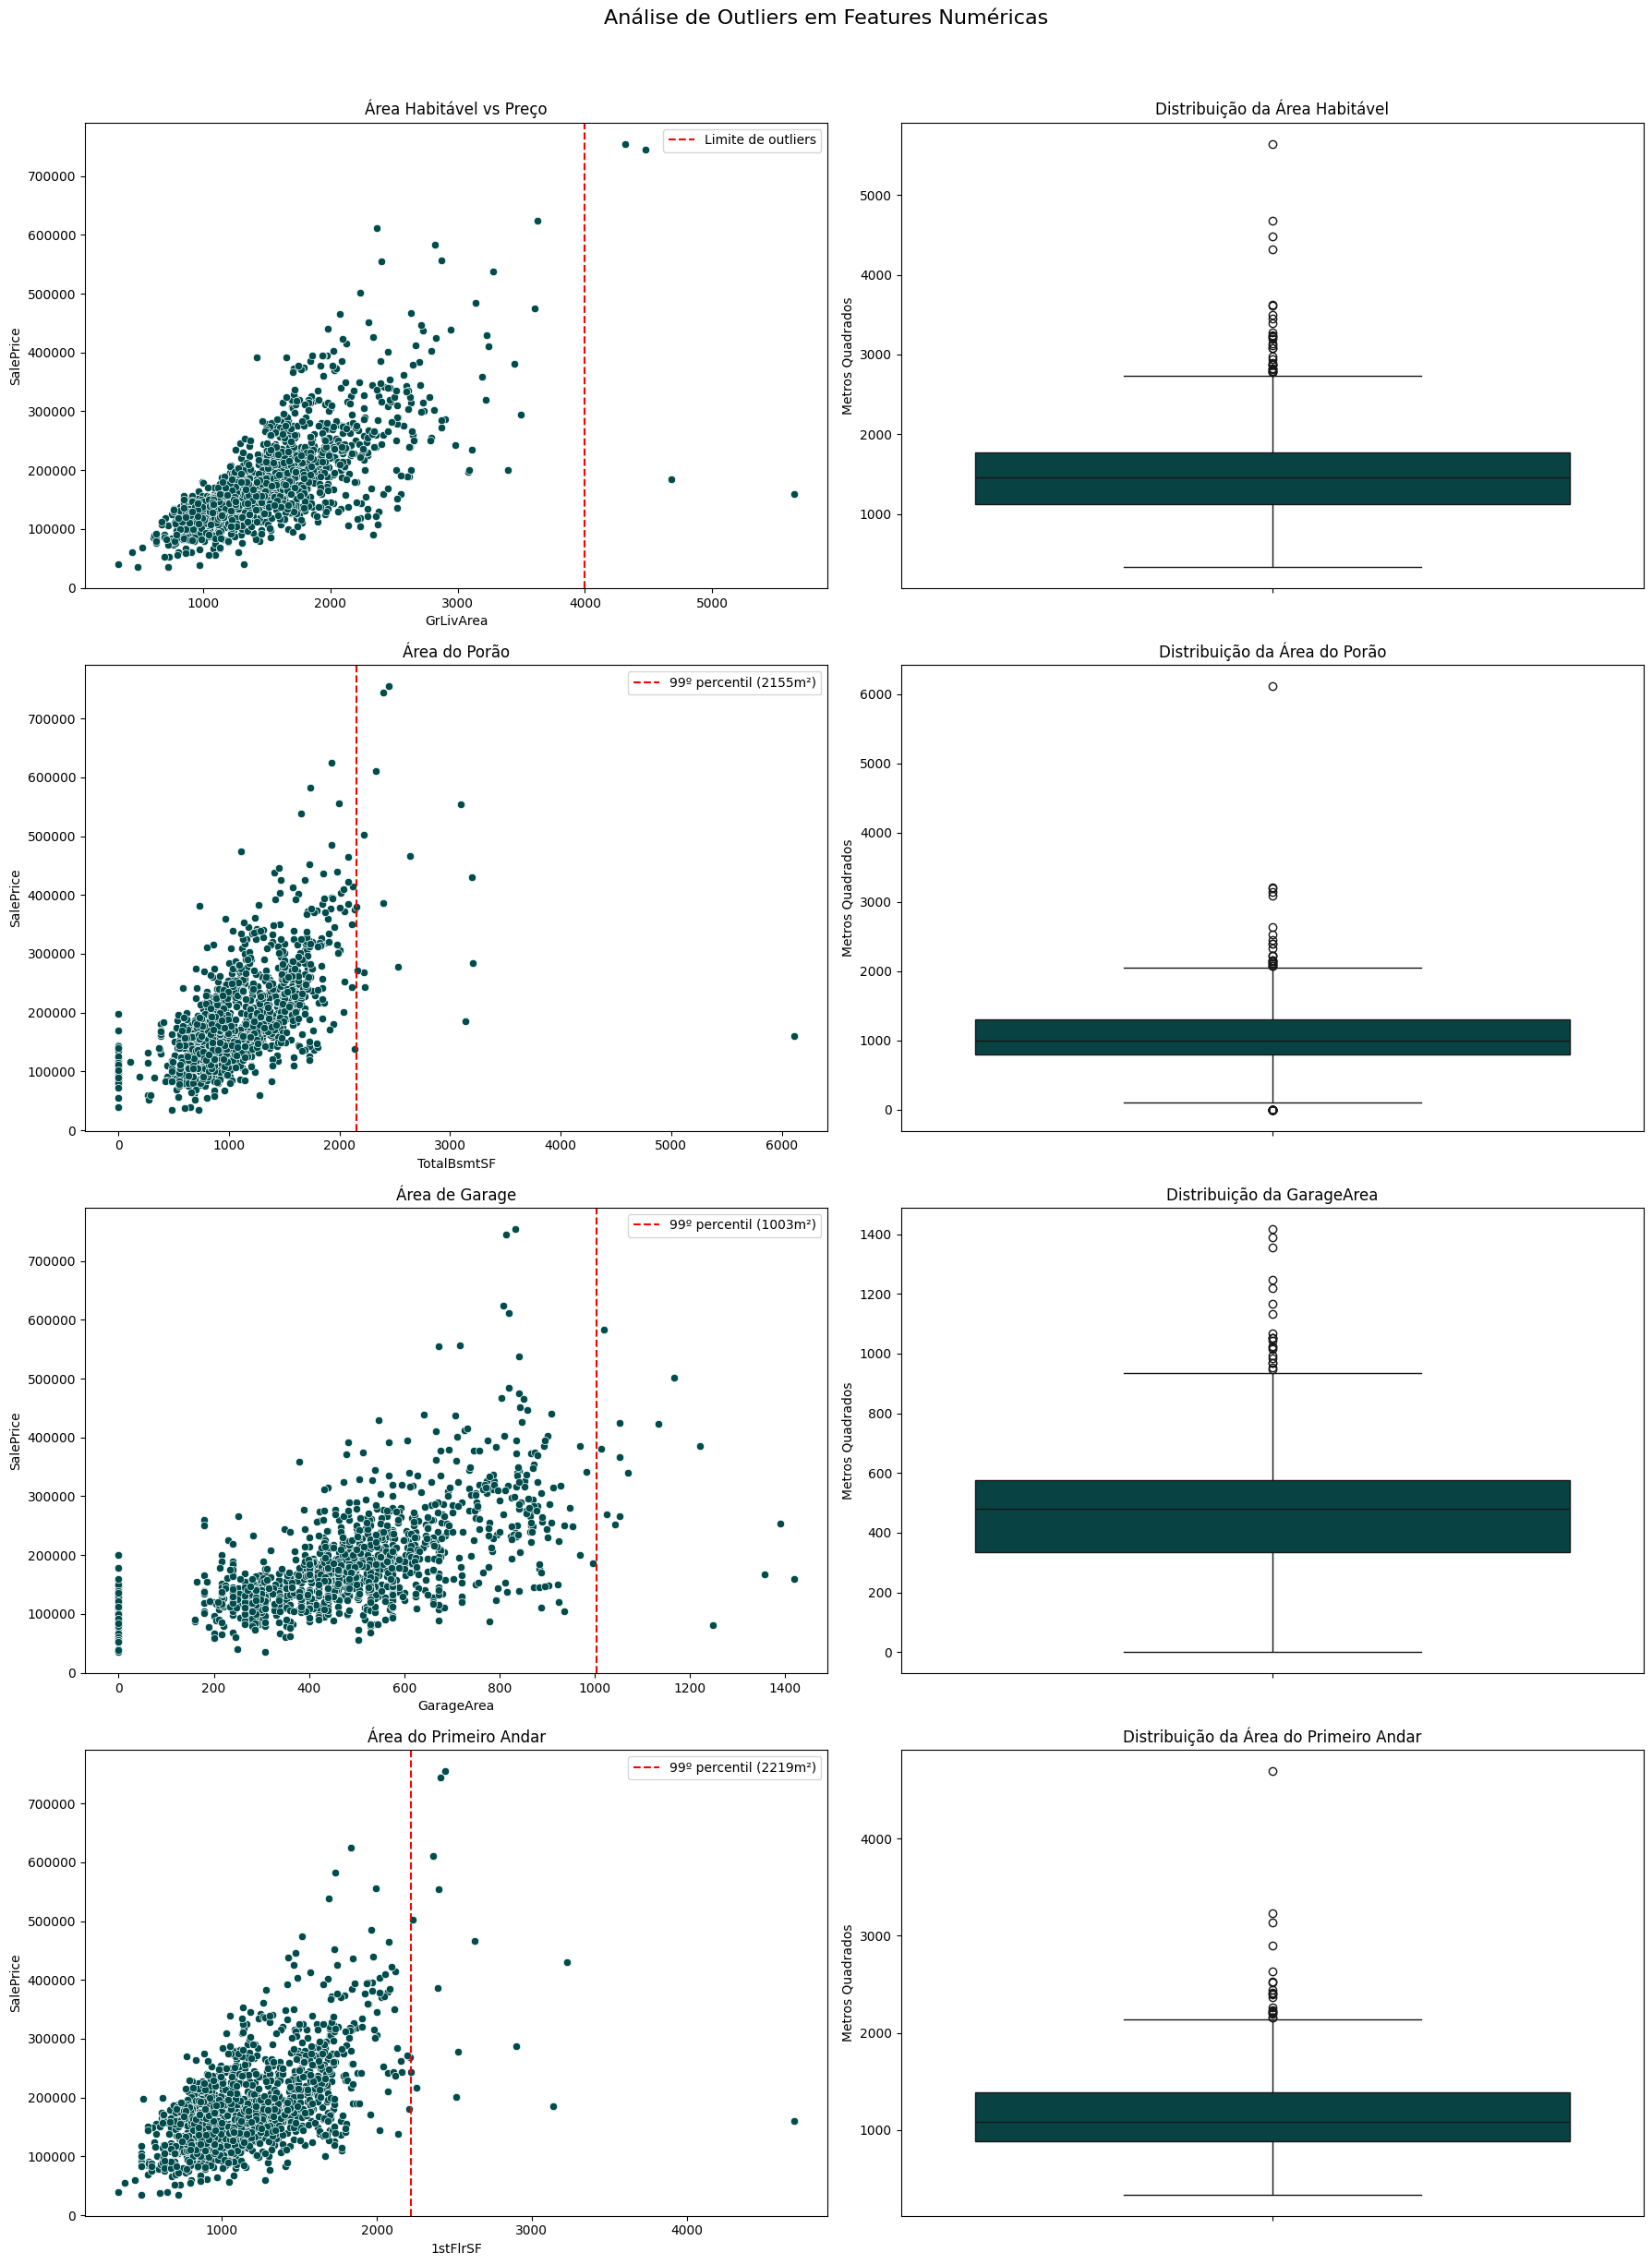

In [7]:
# Identificando outliers em área útil
# opc1. definindo valor
outliers = df[df["GrLivArea"] > 4000]
# Quantos estão acima de 4000?
outliers_GLA = df[df["GrLivArea"] > 4000 ]
print(f"{len(outliers_GLA )} casas com área de 4000 m2.")



# Configuração dos subplots
fig, axs = plt.subplots(4, 2, figsize=(18, 24))
fig.suptitle('Análise de Outliers em Features Numéricas', y=1.02, fontsize=16)

# Gráfico 1 - Área Construída
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df, ax=axs[0, 0])
axs[0, 0].axvline(4000, color='red', linestyle='--', label='Limite de outliers')
axs[0, 0].set_title("Área Habitável vs Preço")
axs[0, 0].legend()

# Gráfico 2 - Boxplot Área Construída
sns.boxplot(y=df["GrLivArea"], ax=axs[0, 1])
axs[0, 1].set_title("Distribuição da Área Habitável")
axs[0, 1].set_ylabel("Metros Quadrados")

# opc2. definindo percentual quantile

# Gráfico 3 - Área do Porão
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df, ax=axs[1, 0])
basement_thresh = df["TotalBsmtSF"].quantile(0.99)
axs[1, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[1, 0].set_title("Área do Porão")
axs[1, 0].legend()

# Gráfico 4 - Boxplot Área do Porão
sns.boxplot(y=df["TotalBsmtSF"], ax=axs[1, 1])
axs[1, 1].set_title("Distribuição da Área do Porão")
axs[1, 1].set_ylabel("Metros Quadrados")


# Gráfico 5 - Boxplot Área de Garage
sns.scatterplot(x="GarageArea", y="SalePrice", data=df, ax=axs[2, 0])
basement_thresh = df["GarageArea"].quantile(0.99)
axs[2, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[2, 0].set_title("Área de Garage")
axs[2, 0].legend()

# Gráfico 6 - Boxplot Área do Porão
sns.boxplot(y=df["GarageArea"], ax=axs[2, 1])
axs[2, 1].set_title("Distribuição da GarageArea")
axs[2, 1].set_ylabel("Metros Quadrados")


# Gráfico 7 - Boxplot Área de Garage
sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df, ax=axs[3, 0])
basement_thresh = df["1stFlrSF"].quantile(0.99)
axs[3, 0].axvline(basement_thresh, color='red', linestyle='--', 
                  label=f'99º percentil ({basement_thresh:.0f}m²)')
axs[3, 0].set_title("Área do Primeiro Andar")
axs[3, 0].legend()

# Gráfico 8 - Boxplot Área do Porão
sns.boxplot(y=df["1stFlrSF"], ax=axs[3, 1])
axs[3, 1].set_title("Distribuição da Área do Primeiro Andar")
axs[3, 1].set_ylabel("Metros Quadrados")


# Ajustes finais
plt.tight_layout()
plt.show()

# # Quantos estão acima do percentil 99?
# outliers_bsmt = df[df["TotalBsmtSF"] > df["TotalBsmtSF"].quantile(0.99)]
# print(outliers_bsmt[["TotalBsmtSF", "SalePrice"]])
# print(f"{len(outliers_bsmt)} casas com área de porão acima do percentil 99.")




Q1 = df["SalePrice"].quantile(0.25)
Q3 = df["SalePrice"].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

outliers_price = df[(df["SalePrice"] < lim_inf) | (df["SalePrice"] > lim_sup)]
#print(f"{len(outliers_price)} outliers detectados com base em IQR.")

```markdown
📌 **Nota:** 
```

---
### 7. Análise de Variáveis Categóricas 

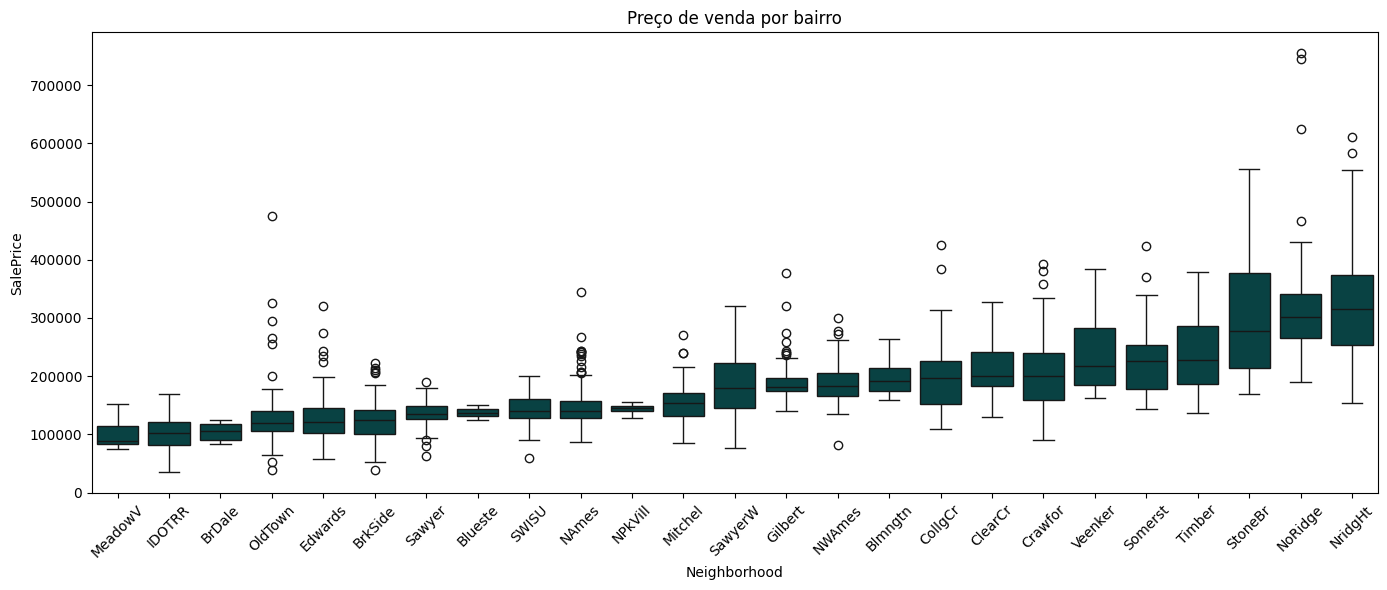

In [8]:
plt.figure(figsize=(14, 6))
order = df.groupby("Neighborhood")["SalePrice"].median().sort_values().index
sns.boxplot(x="Neighborhood", y="SalePrice", data=df, order=order)
plt.xticks(rotation=45)
plt.title("Preço de venda por bairro")
plt.tight_layout()
plt.show()


```markdown
📌 **Nota:** 
```

## 💡  Insights Finais

🧠 **Principais descobertas da EDA:**

- `OverallQual`, `GrLivArea` e `GarageCars` têm forte correlação com o preço de venda.
- Variáveis como `Neighborhood`, `ExterQual` e `TotalBsmtSF` ajudam a explicar variações nos preços.
- A distribuição de `SalePrice` não é normal. Transformações podem ser úteis na modelagem.
- Outliers extremos foram detectados em `GrLivArea`, `TotalBsmtSF` e `GarageArea`. Devem ser tratados.


---

Próximos passos: limpeza de dados, transformação de variáveis e engenharia de features para modelagem.
